# Phân tích mức tiêu hao nhiên liệu

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
cars_data = pd.read_csv('./data/mpg.csv')

## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [24]:
cars_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### 2.2 Xóa các dòng không có dữ liệu


In [25]:
cars_data.dropna(inplace=True)

### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [26]:
print("Trung bình của cylinders: ", cars_data['cylinders'].mean())
print("Trung bình của horsepower: ", cars_data['horsepower'].mean())
print("Trung bình của weight: ", cars_data['weight'].mean())

print()
print("Trung vị của cylinders: ", cars_data['cylinders'].median())
print("Trung vị của horsepower: ", cars_data['horsepower'].median())
print("Trung vị của weight: ", cars_data['weight'].median())

Trung bình của cylinders:  5.471938775510204
Trung bình của horsepower:  104.46938775510205
Trung bình của weight:  2977.5841836734694

Trung vị của cylinders:  4.0
Trung vị của horsepower:  93.5
Trung vị của weight:  2803.5


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [27]:
print("Miền giá trị của mpg:", cars_data['mpg'].min(), "-", cars_data['mpg'].max())
print("Miền phân vị của mpg:", cars_data['mpg'].quantile(0.25), "-", cars_data['mpg'].quantile(0.75))

Miền giá trị của mpg: 9.0 - 46.6
Miền phân vị của mpg: 17.0 - 29.0


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [28]:
cars_data.groupby('origin')['mpg'].mean()

origin
europe    27.602941
japan     30.450633
usa       20.033469
Name: mpg, dtype: float64

## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

<Axes: xlabel='weight', ylabel='Count'>

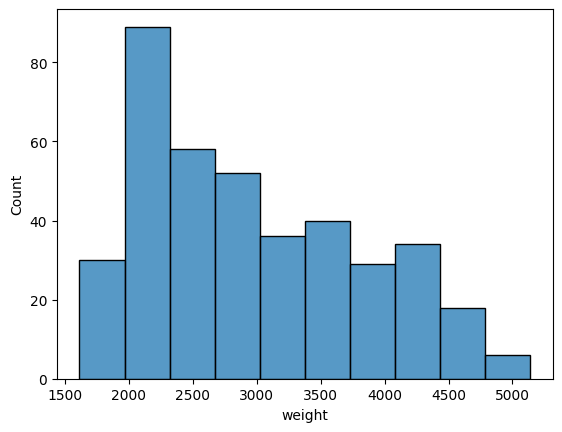

In [30]:
sns.histplot(cars_data['weight'])

## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [32]:
cars_data.groupby('origin')['name'].value_counts(normalize=True)

origin  name                 
europe  peugeot 504              0.058824
        volkswagen dasher        0.044118
        audi 100ls               0.029412
        fiat 128                 0.029412
        opel 1900                0.029412
                                   ...   
usa     pontiac lemans v6        0.004082
        pontiac phoenix lj       0.004082
        pontiac safari (sw)      0.004082
        pontiac sunbird coupe    0.004082
        pontiac ventura sj       0.004082
Name: proportion, Length: 301, dtype: float64

## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

{'whiskers': [<matplotlib.lines.Line2D at 0x2e9d0b0ead0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e9d0b202d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e9d0b0ded0>,
 'medians': [<matplotlib.lines.Line2D at 0x2e9d0b218d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2e9d0b22350>,
 'means': []}

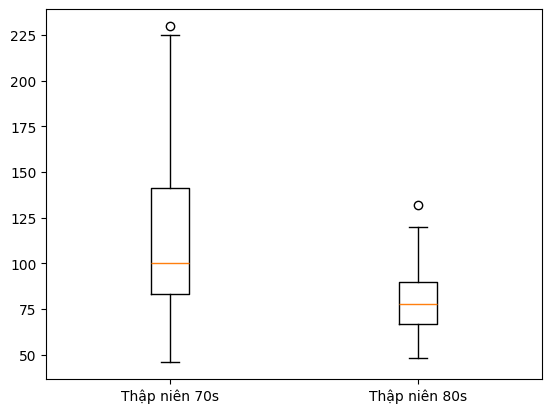

In [46]:
# Boxplot compare horsepower of cars from the 70s and 80s
cars_70s_hp = cars_data[(cars_data['model_year'] >= 70) & (cars_data['model_year'] < 80)]['horsepower']

cars_80_hp = cars_data[(cars_data['model_year'] >= 80) & (cars_data['model_year'] < 90)]['horsepower']

plt.boxplot([cars_70s_hp, cars_80_hp], labels=['Thập niên 70s', 'Thập niên 80s'])

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

<Axes: xlabel='cylinders', ylabel='mpg'>

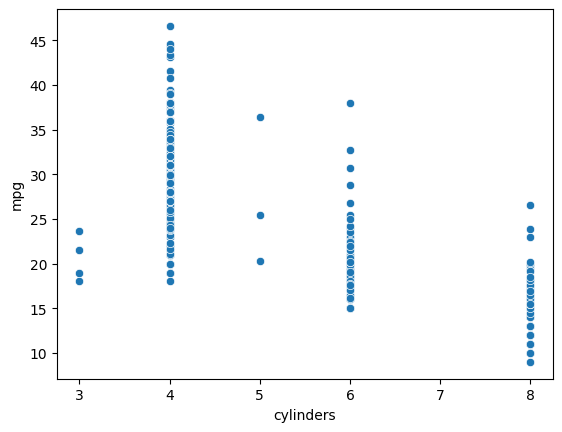

In [49]:
sns.scatterplot(x='cylinders', y='mpg', data=cars_data)

### 7.2 Với công suất theo mã lực

<Axes: xlabel='horsepower', ylabel='mpg'>

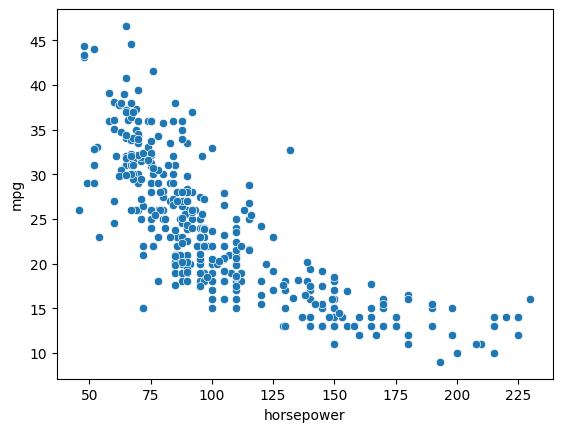

In [50]:
sns.scatterplot(x='horsepower', y='mpg', data=cars_data)

### 7.3 Với gia tốc

<Axes: xlabel='acceleration', ylabel='mpg'>

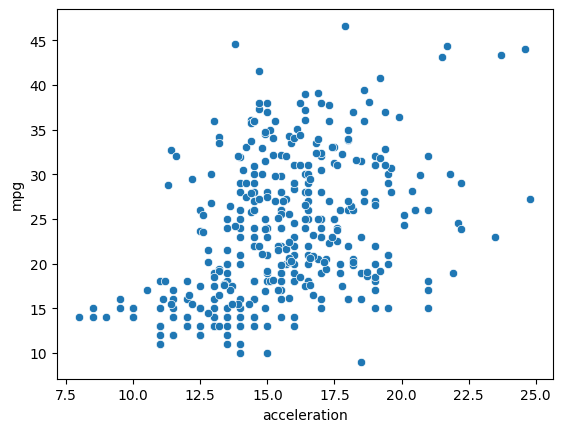

In [51]:
sns.scatterplot(x='acceleration', y='mpg', data=cars_data)

### 7.4 Với năm sản xuất

<Axes: xlabel='model_year', ylabel='mpg'>

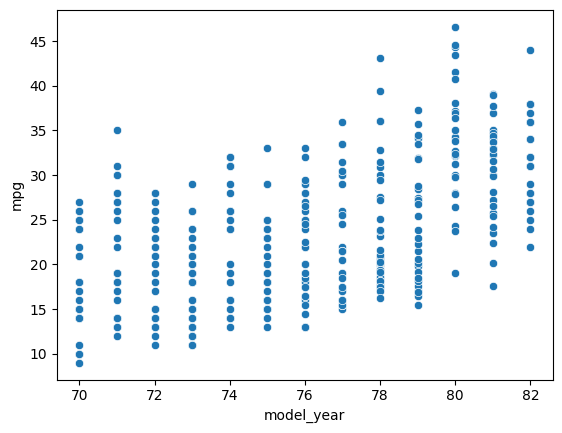

In [54]:
sns.scatterplot(x='model_year', y='mpg', data=cars_data)